Homework 1
==========


In this homework...

* Analyze the distribution of measurements of pesticide content in water supplies in California (measurements between 6/1/2020 and 8/1/2020, provided by EPA)

* Determine moments of the distribution based on an ensemble average and using the distribution

* Demonstrate how a predicted distribution based on the first two moments can lead to erroneous behavior

* Analyze measured properties including Nitrate, Nitrite, and Arsenic (see data file for more properties)

Problem statement
-----------------------

1. Extract the 'CharacteristicName' equal to 'Nitrate' from the exp_data. Find the number of data points 'n_e' (note, 'len(x)' gives the length of an array 'x').

2. Generate a probability density function for the distribution of nitrate concentrations using the histogram properties ('x0', 'xf', and 'n_bin') used in the exercise. Show that this histogram does not get agreement between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram.

3. Vary the maximum value in the histogram 'xf' and the number of bins 'n_bin' until we get agreement (precision of 1 decimal place) between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram. Note, the maximum value 'xf' should be larger than the largest value in the set (note, 'np.max(x)' gives the largest value in the array 'x').

4. Plot the histogram against a proposed model $f_{x}(x) = \lambda \exp (-\lambda x)$, noting the property $\langle x \rangle = 1/\lambda$. Generate a linear plot and a semilog plot (i.e. $\log_{10} f_{x}$ versus $x$).

5. Find the first 6 moments of the distribution. Plot these moments against the theoretical predictions on a semilog plot (i.e. $\log_{10} \langle x^{m} \rangle$ versus $m$)

6. Determine the lower bound of the histogram for the case of there being only 1 measurement that falls within a bin (i.e. only one instance of measured value). Replot the histogram on a semilog axis with this minimum value as a horizontal line.

7. Now perform the same analyses on a 'CharacteristicName' of your choice. Options include 'Nitrite' and 'Arsenic', but other options can be found in the raw data file ('data/ca_water.csv').

Import the necessary modules

In [103]:
import numpy as np
import sys
import pandas as pd
sys.path.append('../')
import matplotlib.pyplot as plt

Load the data [https://www.epa.gov/waterdata/water-quality-data-download]

In [104]:
data = pd.read_csv("ca_water.csv", low_memory = False)
exp_data = data[['CharacteristicName', 'ResultMeasureValue']]

In [105]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

1. Extract the 'CharacteristicName' equal to 'Nitrate' from the exp_data. Find the number of data points 'n_e' (note, 'len(x)' gives the length of an array 'x').

In [106]:
x = np.array(exp_data[exp_data['CharacteristicName'] == 'Nitrate']['ResultMeasureValue'])

pesticide = np.array([])
for i in range(len(x)):
    if isfloat(x[i]):
        if np.logical_not(np.isnan(float(x[i]))):
            pesticide = np.append(pesticide, float(x[i]))
    else:
        pesticide = np.append(pesticide, 0)

In [107]:
print(len(pesticide))
print(len(x))

343
461


2. Generate a probability density function for the distribution of nitrate concentrations using the histogram properties ('x0', 'xf', and 'n_bin') used in the exercise.

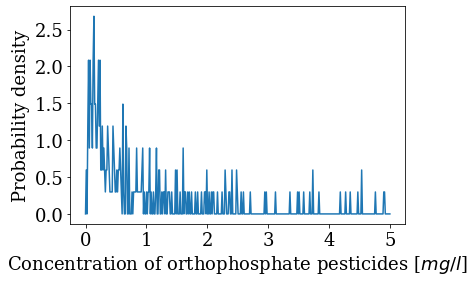

In [108]:
x0 = 0
xf = 5
n_bin = 400
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(pesticide, bins=x_bin, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob)

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

3. Vary the maximum value in the histogram 'xf' and the number of bins 'n_bin' until we get agreement (precision of 2 decimal places) between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram.

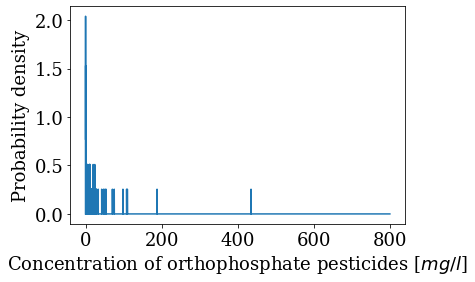

In [109]:
x0 = 0
xf = 800
n_bin = 70000
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(pesticide, bins=x_bin, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob)

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

3a.Calculate the first two moments directly from the data

In [110]:
conc_ave = np.mean(pesticide)
conc2_ave = np.mean(pesticide ** 2)

In [111]:
print(conc_ave)
print(conc2_ave)

6.9912973760932955
856.8678789591838


3b.Calculate the first two moments from the histogram

In [112]:
conc_ave_hist = np.sum(x ** 1 * prob * delta_x)
conc2_ave_hist = np.sum(x ** 2 * prob * delta_x)

In [113]:
print(conc_ave_hist)
print(conc2_ave_hist)

6.990520522637993
856.8636778841501


4. Plot the histogram against a proposed model $f_{x}(x) = \lambda \exp (-\lambda x)$, noting the property $\langle x \rangle = 1/\lambda$. Generate a linear plot and a semilog plot (i.e. $\log_{10} f_{x}$ versus $x$).

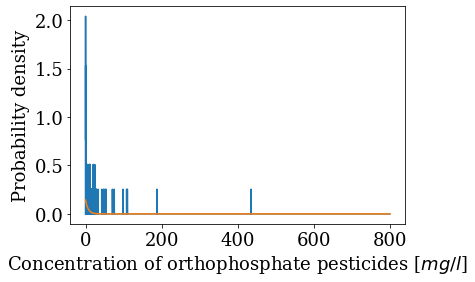

In [114]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

plt.plot(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

5. Find the first 6 moments of the distribution. Plot these moments against the theoretical predictions on a semilog plot (i.e. $\log_{10} \langle x^{m} \rangle$ versus $m$)

In [115]:
n_m = 6
moment = np.zeros((n_m, 2))
moment_th = np.zeros(n_m)

lam = 1 / conc_ave_hist
for i_m in range(n_m):
    moment[i_m, 0] = np.sum(x ** i_m * prob * delta_x)
    moment[i_m, 1] = np.mean(pesticide ** i_m)
    moment_th[i_m] = np.math.factorial(i_m) / lam ** i_m
    

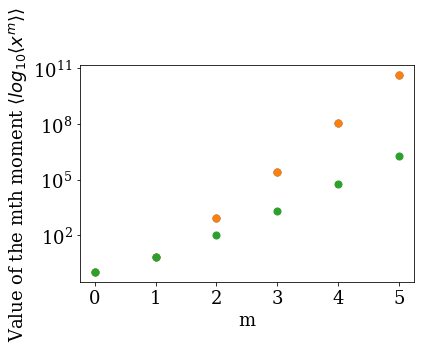

In [116]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist
mom_ind = np.linspace(0, n_m - 1, n_m)

plt.scatter(mom_ind, moment[:,0], color = 'C0', s = 50)
plt.scatter(mom_ind, moment[:,1], color = 'C1', s = 50)
plt.scatter(mom_ind, moment_th, color = 'C2', s = 50)

plt.yscale('log')
plt.xlabel('m')
plt.ylabel(r'Value of the mth moment $\langle log _{10} \langle x^{m}\rangle \rangle$')

plt.show()

In [117]:
moment

array([[1.00000000e+00, 1.00000000e+00],
       [6.99052052e+00, 6.99129738e+00],
       [8.56863678e+02, 8.56867879e+02],
       [2.74265866e+05, 2.74264382e+05],
       [1.09387750e+08, 1.09387045e+08],
       [4.62280053e+10, 4.62276907e+10]])

6. Determine the lower bound of the histogram for the case of there being only 1 measurement that falls within a bin (i.e. only one instance of measured value). Replot the histogram on a semilog axis with this minimum value as a horizontal line.



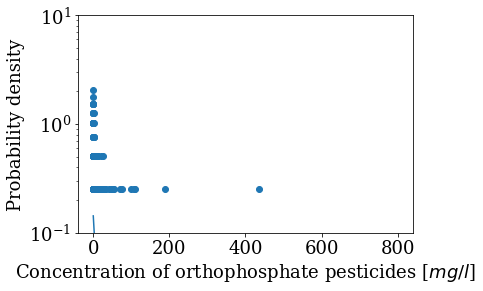

In [118]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

#plt.xscale('log')
plt.yscale('log')

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-1,10])
plt.show()

In [119]:
dummy = prob.copy()
dummy[dummy==0]=10
min_prob = min(dummy)
min_prob


0.2550983965014546

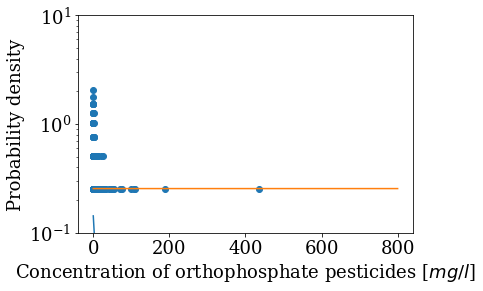

In [123]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))
plt.plot(x, min_prob+x-x)

#plt.xscale('log')
plt.yscale('log')

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-1,10])
plt.show()


7. Now perform the same analyses on a 'CharacteristicName' of your choice. Options include 'Nitrite' and 'Arsenic', but other options can be found in the raw data file ('data/ca_water.csv').

7.1. Extract the 'CharacteristicName' equal to 'Nitrite' from the exp_data. Find the number of data points 'n_e' (note, 'len(x)' gives the length of an array 'x').

In [124]:
x = np.array(exp_data[exp_data['CharacteristicName'] == 'Nitrite']['ResultMeasureValue'])

pesticide = np.array([])
for i in range(len(x)):
    if isfloat(x[i]):
        if np.logical_not(np.isnan(float(x[i]))):
            pesticide = np.append(pesticide, float(x[i]))
    else:
        pesticide = np.append(pesticide, 0)

7.2. Generate a probability density function for the distribution of nitrate concentrations using the histogram properties ('x0', 'xf', and 'n_bin') used in the exercise.

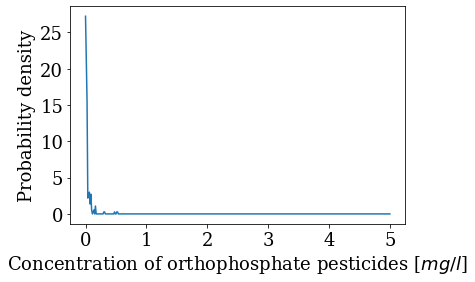

In [125]:
x0 = 0
xf = 5
n_bin = 400
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(pesticide, bins=x_bin, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob)

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

7.3. Vary the maximum value in the histogram 'xf' and the number of bins 'n_bin' until we get agreement (precision of 2 decimal places) between $\langle c \rangle$ and $\langle c^{2} \rangle$ calculated from the data and from the histogram.

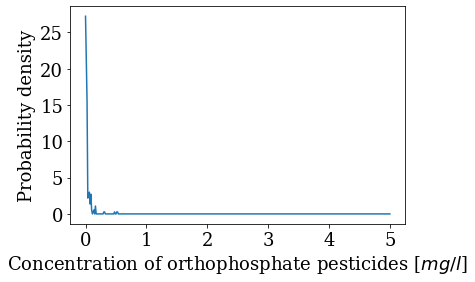

In [129]:
x0 = 0
xf = 5
n_bin = 400
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(pesticide, bins=x_bin, density = True)

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob)

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

7.3a.Calculate the first two moments directly from the data

In [130]:
conc_ave = np.mean(pesticide)
conc2_ave = np.mean(pesticide ** 2)

In [131]:
print(conc_ave)
print(conc2_ave)

0.029723549488054606
0.004652276450511945


7.3a.Calculate the first two moments directly from the histogram

In [132]:
conc_ave_hist = np.sum(x ** 1 * prob * delta_x)
conc2_ave_hist = np.sum(x ** 2 * prob * delta_x)

In [133]:
print(conc_ave_hist)
print(conc2_ave_hist)

0.029125715312171202
0.004672973031087641


7.4. Plot the histogram against a proposed model $f_{x}(x) = \lambda \exp (-\lambda x)$, noting the property $\langle x \rangle = 1/\lambda$. Generate a linear plot and a semilog plot (i.e. $\log_{10} f_{x}$ versus $x$).

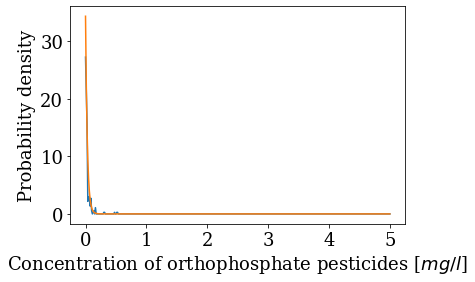

In [134]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

plt.plot(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.show()

7.5. Find the first 6 moments of the distribution. Plot these moments against the theoretical predictions on a semilog plot (i.e. $\log_{10} \langle x^{m} \rangle$ versus $m$)

In [135]:
n_m = 6
moment = np.zeros((n_m, 2))
moment_th = np.zeros(n_m)

lam = 1 / conc_ave_hist
for i_m in range(n_m):
    moment[i_m, 0] = np.sum(x ** i_m * prob * delta_x)
    moment[i_m, 1] = np.mean(pesticide ** i_m)
    moment_th[i_m] = np.math.factorial(i_m) / lam ** i_m

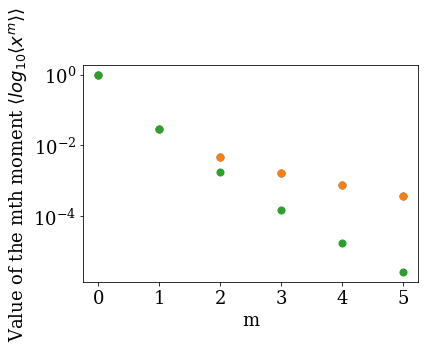

In [137]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist
mom_ind = np.linspace(0, n_m - 1, n_m)

plt.scatter(mom_ind, moment[:,0], color = 'C0', s = 50)
plt.scatter(mom_ind, moment[:,1], color = 'C1', s = 50)
plt.scatter(mom_ind, moment_th, color = 'C2', s = 50)

plt.yscale('log')
plt.xlabel('m')
plt.ylabel(r'Value of the mth moment $\langle log _{10} \langle x^{m}\rangle \rangle$')

plt.show()

In [138]:
moment


array([[1.00000000e+00, 1.00000000e+00],
       [2.91257153e-02, 2.97235495e-02],
       [4.67297303e-03, 4.65227645e-03],
       [1.66614851e-03, 1.65582318e-03],
       [7.53112987e-04, 7.45901233e-04],
       [3.64641743e-04, 3.59608935e-04]])

7.6. Determine the lower bound of the histogram for the case of there being only 1 measurement that falls within a bin (i.e. only one instance of measured value). Replot the histogram on a semilog axis with this minimum value as a horizontal line.



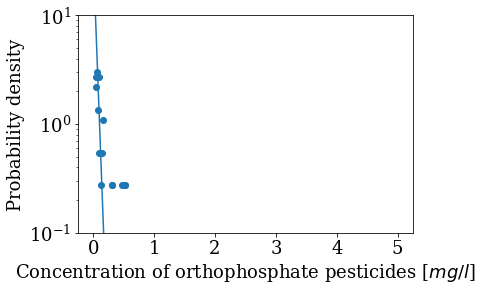

In [139]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))

#plt.xscale('log')
plt.yscale('log')

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-1,10])
plt.show()

In [141]:
dummy = prob.copy()
dummy[dummy==0]=10
min_prob = min(dummy)
min_prob


0.2723549488054596

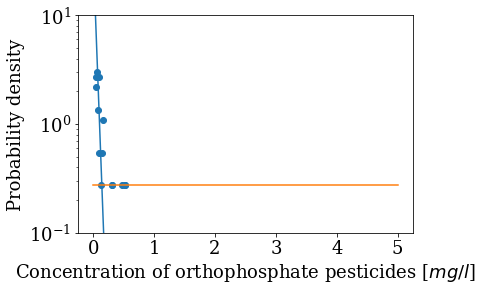

In [142]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam = 1 / conc_ave_hist

plt.scatter(x, prob)
plt.plot(x, lam * np.exp(-lam * x))
plt.plot(x, min_prob+x-x)

#plt.xscale('log')
plt.yscale('log')

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density')

plt.ylim([1e-1,10])
plt.show()

